Section 1: Data Cleaning



In [1]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('creditcard.csv')

# 1. Data Overview
print("Data Overview:")
print(data.info())  # Overview of columns and data types
print(data.describe())  # Summary statistics

# Check for null values
print("Null values in dataset:")
print(data.isnull().sum())

# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicate rows if any
data = data.drop_duplicates()


Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17918 entries, 0 to 17917
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    17918 non-null  int64  
 1   V1      17918 non-null  float64
 2   V2      17918 non-null  float64
 3   V3      17918 non-null  float64
 4   V4      17918 non-null  float64
 5   V5      17917 non-null  float64
 6   V6      17917 non-null  float64
 7   V7      17917 non-null  float64
 8   V8      17917 non-null  float64
 9   V9      17917 non-null  float64
 10  V10     17917 non-null  float64
 11  V11     17917 non-null  float64
 12  V12     17917 non-null  float64
 13  V13     17917 non-null  float64
 14  V14     17917 non-null  float64
 15  V15     17917 non-null  float64
 16  V16     17917 non-null  float64
 17  V17     17917 non-null  float64
 18  V18     17917 non-null  float64
 19  V19     17917 non-null  float64
 20  V20     17917 non-null  float64
 21  V21     17917 non-nu

In [2]:
# 2. Handling Missing Data
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Fill missing values (if any)
# Assuming there are missing values for demonstration purposes
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

for col in numerical_cols:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mean(), inplace=True)

for col in categorical_cols:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)

Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


<ipython-input-2-b97942bda73a>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [3]:
# 3. Outlier Detection and Handling
# Identify outliers in "Amount" and "V1" using IQR
for col in ['Amount', 'V1']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with bounds
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

In [4]:
# 4. Data Transformation
# Convert "Amount" to categorical based on a condition
data['Amount_Category'] = pd.cut(data['Amount'], bins=[-1, 50, 200, np.inf], labels=['Low', 'Medium', 'High'])

# Standardize "V2"
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['V2_Standardized'] = scaler.fit_transform(data[['V2']])

In [5]:
# 5. Logical Validation
# Example: Ensure "Time" is not negative
data = data[data['Time'] >= 0]

# Ensure "Class" column has only 0 and 1
data = data[data['Class'].isin([0, 1])]

# Final overview of cleaned data
print("Cleaned Data Overview:")
print(data.info())

Cleaned Data Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 17862 entries, 0 to 17916
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Time             17862 non-null  int64   
 1   V1               17862 non-null  float64 
 2   V2               17862 non-null  float64 
 3   V3               17862 non-null  float64 
 4   V4               17862 non-null  float64 
 5   V5               17862 non-null  float64 
 6   V6               17862 non-null  float64 
 7   V7               17862 non-null  float64 
 8   V8               17862 non-null  float64 
 9   V9               17862 non-null  float64 
 10  V10              17862 non-null  float64 
 11  V11              17862 non-null  float64 
 12  V12              17862 non-null  float64 
 13  V13              17862 non-null  float64 
 14  V14              17862 non-null  float64 
 15  V15              17862 non-null  float64 
 16  V16              17862

Section 2: Data Visualization

In [6]:
# setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'creditcard.csv'  # Replace with your dataset's path
data = pd.read_csv(file_path)

# Inspect data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


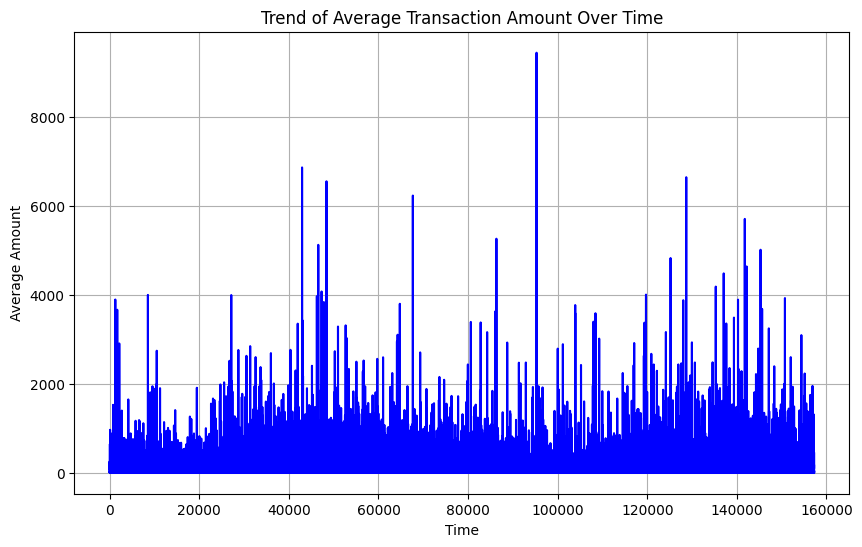

In [7]:
#trend analysis line chart
# Trend analysis for 'Time' and 'Amount'
plt.figure(figsize=(10, 6))
data.groupby('Time')['Amount'].mean().plot(kind='line', color='blue')
plt.title('Trend of Average Transaction Amount Over Time')
plt.xlabel('Time')
plt.ylabel('Average Amount')
plt.grid(True)
plt.show()

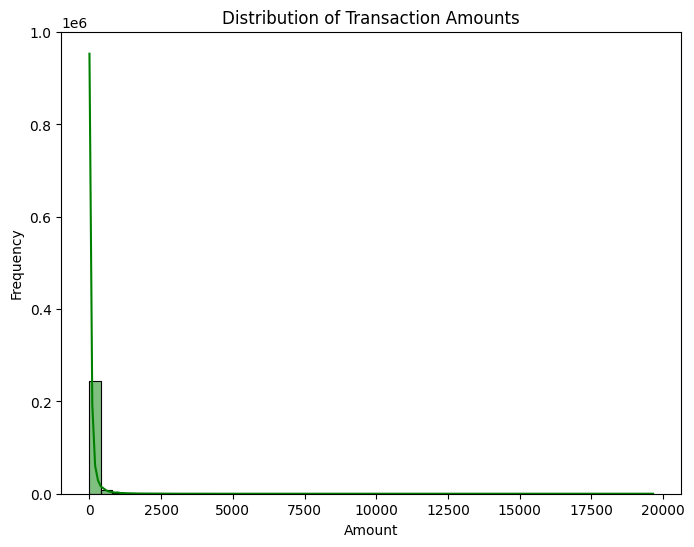

In [8]:
# distribution analysis histogram
# Histogram for 'Amount'
plt.figure(figsize=(8, 6))
sns.histplot(data['Amount'], bins=50, kde=True, color='green')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

<ipython-input-9-17509b778948>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Class', y='Amount', hue='Amount_Category', estimator='mean', ci=None)


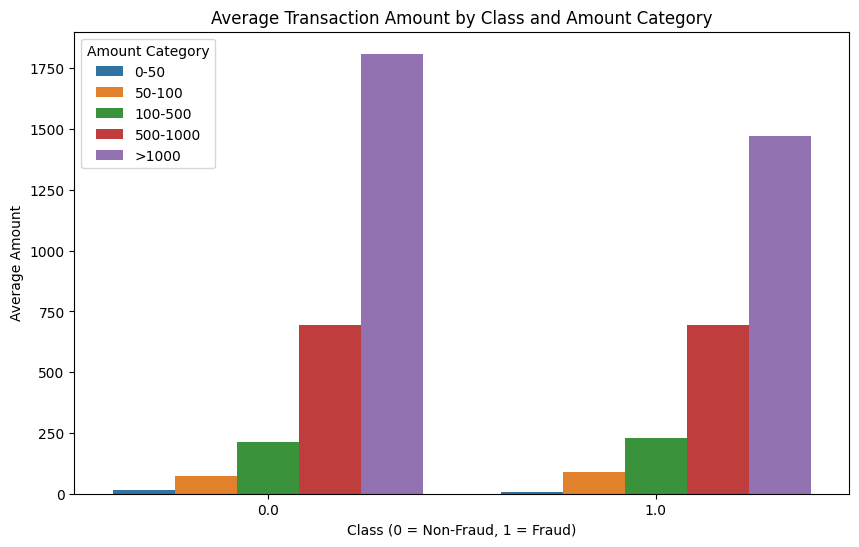

In [9]:
# categorical insights bar chart
# Create a new column 'Amount_Category' based on conditions
data['Amount_Category'] = pd.cut(data['Amount'], bins=[0, 50, 100, 500, 1000, data['Amount'].max()],
                                 labels=['0-50', '50-100', '100-500', '500-1000', '>1000'])

# Bar chart comparing 'Class' and 'Amount_Category'
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Class', y='Amount', hue='Amount_Category', estimator='mean', ci=None)
plt.title('Average Transaction Amount by Class and Amount Category')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Average Amount')
plt.legend(title='Amount Category')
plt.show()

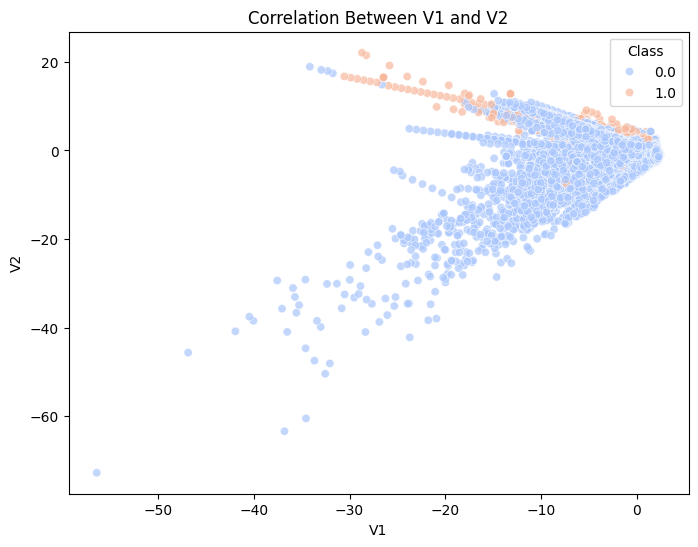

In [10]:
# corelation analysis scatter plot
# Scatter plot for two numerical columns (e.g., 'V1' and 'V2')
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='V1', y='V2', hue='Class', alpha=0.7, palette='coolwarm')
plt.title('Correlation Between V1 and V2')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend(title='Class')
plt.show()

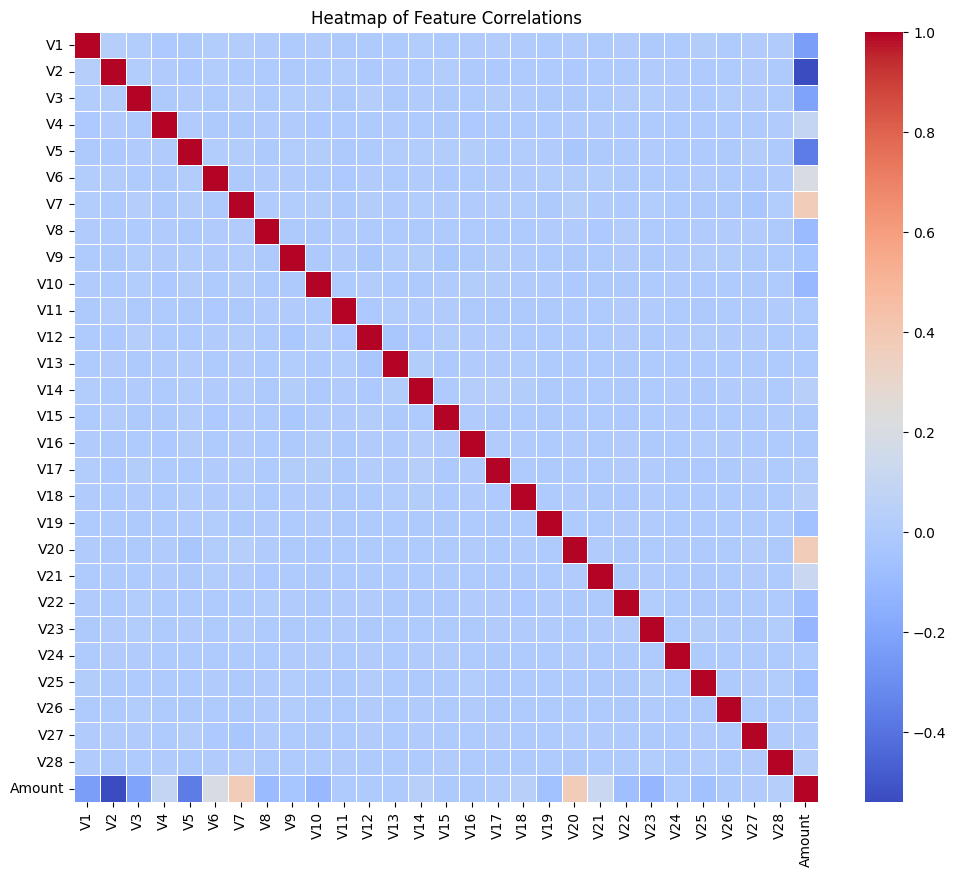

Two strongest correlations:
 Amount  V7        0.378715
V7      Amount    0.378715
dtype: float64


In [11]:
# advanced visualization heatmap
# Correlation heatmap for numerical columns
numerical_cols = data.iloc[:, 1:-2]  # Excluding 'Time', 'Class', and 'Amount_Category'
correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

# Find the two strongest correlations
correlation_matrix_unstacked = correlation_matrix.unstack().sort_values(ascending=False)
strongest_correlations = correlation_matrix_unstacked[correlation_matrix_unstacked != 1].head(2)
print("Two strongest correlations:\n", strongest_correlations)